In [60]:
# 読み込み系？の仕組みや適切な書き方がまだよくわかってない
import numpy as np
from scipy import sparse
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display
!pip install mglearn
import mglearn
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier

In [61]:
iris_dataset = load_iris()

In [62]:
print("Keys of iris_dataset: \n{}".format(iris_dataset.keys()))

Keys of iris_dataset: 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [63]:
# printしなくても出ることがわかった（当然キャプションは出ないけど）
iris_dataset.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [64]:
# 本では省略のためにこう書いてた（最初から１９３文字目まで出力する）
# print(iris_dataset['DESCR'][:193])

print(iris_dataset['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [65]:
print("Target names: {}".format(iris_dataset['target_names']))

Target names: ['setosa' 'versicolor' 'virginica']


In [66]:
print("Target names: {}".format(iris_dataset['feature_names']))

Target names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [67]:
print("Type of data: {}".format(type(iris_dataset['target_names'])))

Type of data: <class 'numpy.ndarray'>


In [68]:
# shapeでデータの形を出す。今回は行・列だった
print("Shape of data: {}".format(iris_dataset['data'].shape))

Shape of data: (150, 4)


In [69]:
print("First five colums of data: \n{}".format(iris_dataset['data'][:5]))

First five colums of data: 
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [70]:
print("Type of target: {}".format(type(iris_dataset['target'])))

Type of target: <class 'numpy.ndarray'>


In [71]:
print("Shape of target: {}".format(iris_dataset['target'].shape))

Shape of target: (150,)


In [72]:
print("Target: \n{}".format(iris_dataset['target']))

Target: 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [73]:
# 0,1,2に対応する花の名前
print("Target names: \n{}".format(iris_dataset['target_names']))

Target names: 
['setosa' 'versicolor' 'virginica']


In [74]:
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], random_state=0)

In [75]:
# 3:1の比率になっている
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (112, 4)
y_train shape: (112,)
X_test shape: (38, 4)
y_test shape: (38,)


<IPython.core.display.Javascript object>


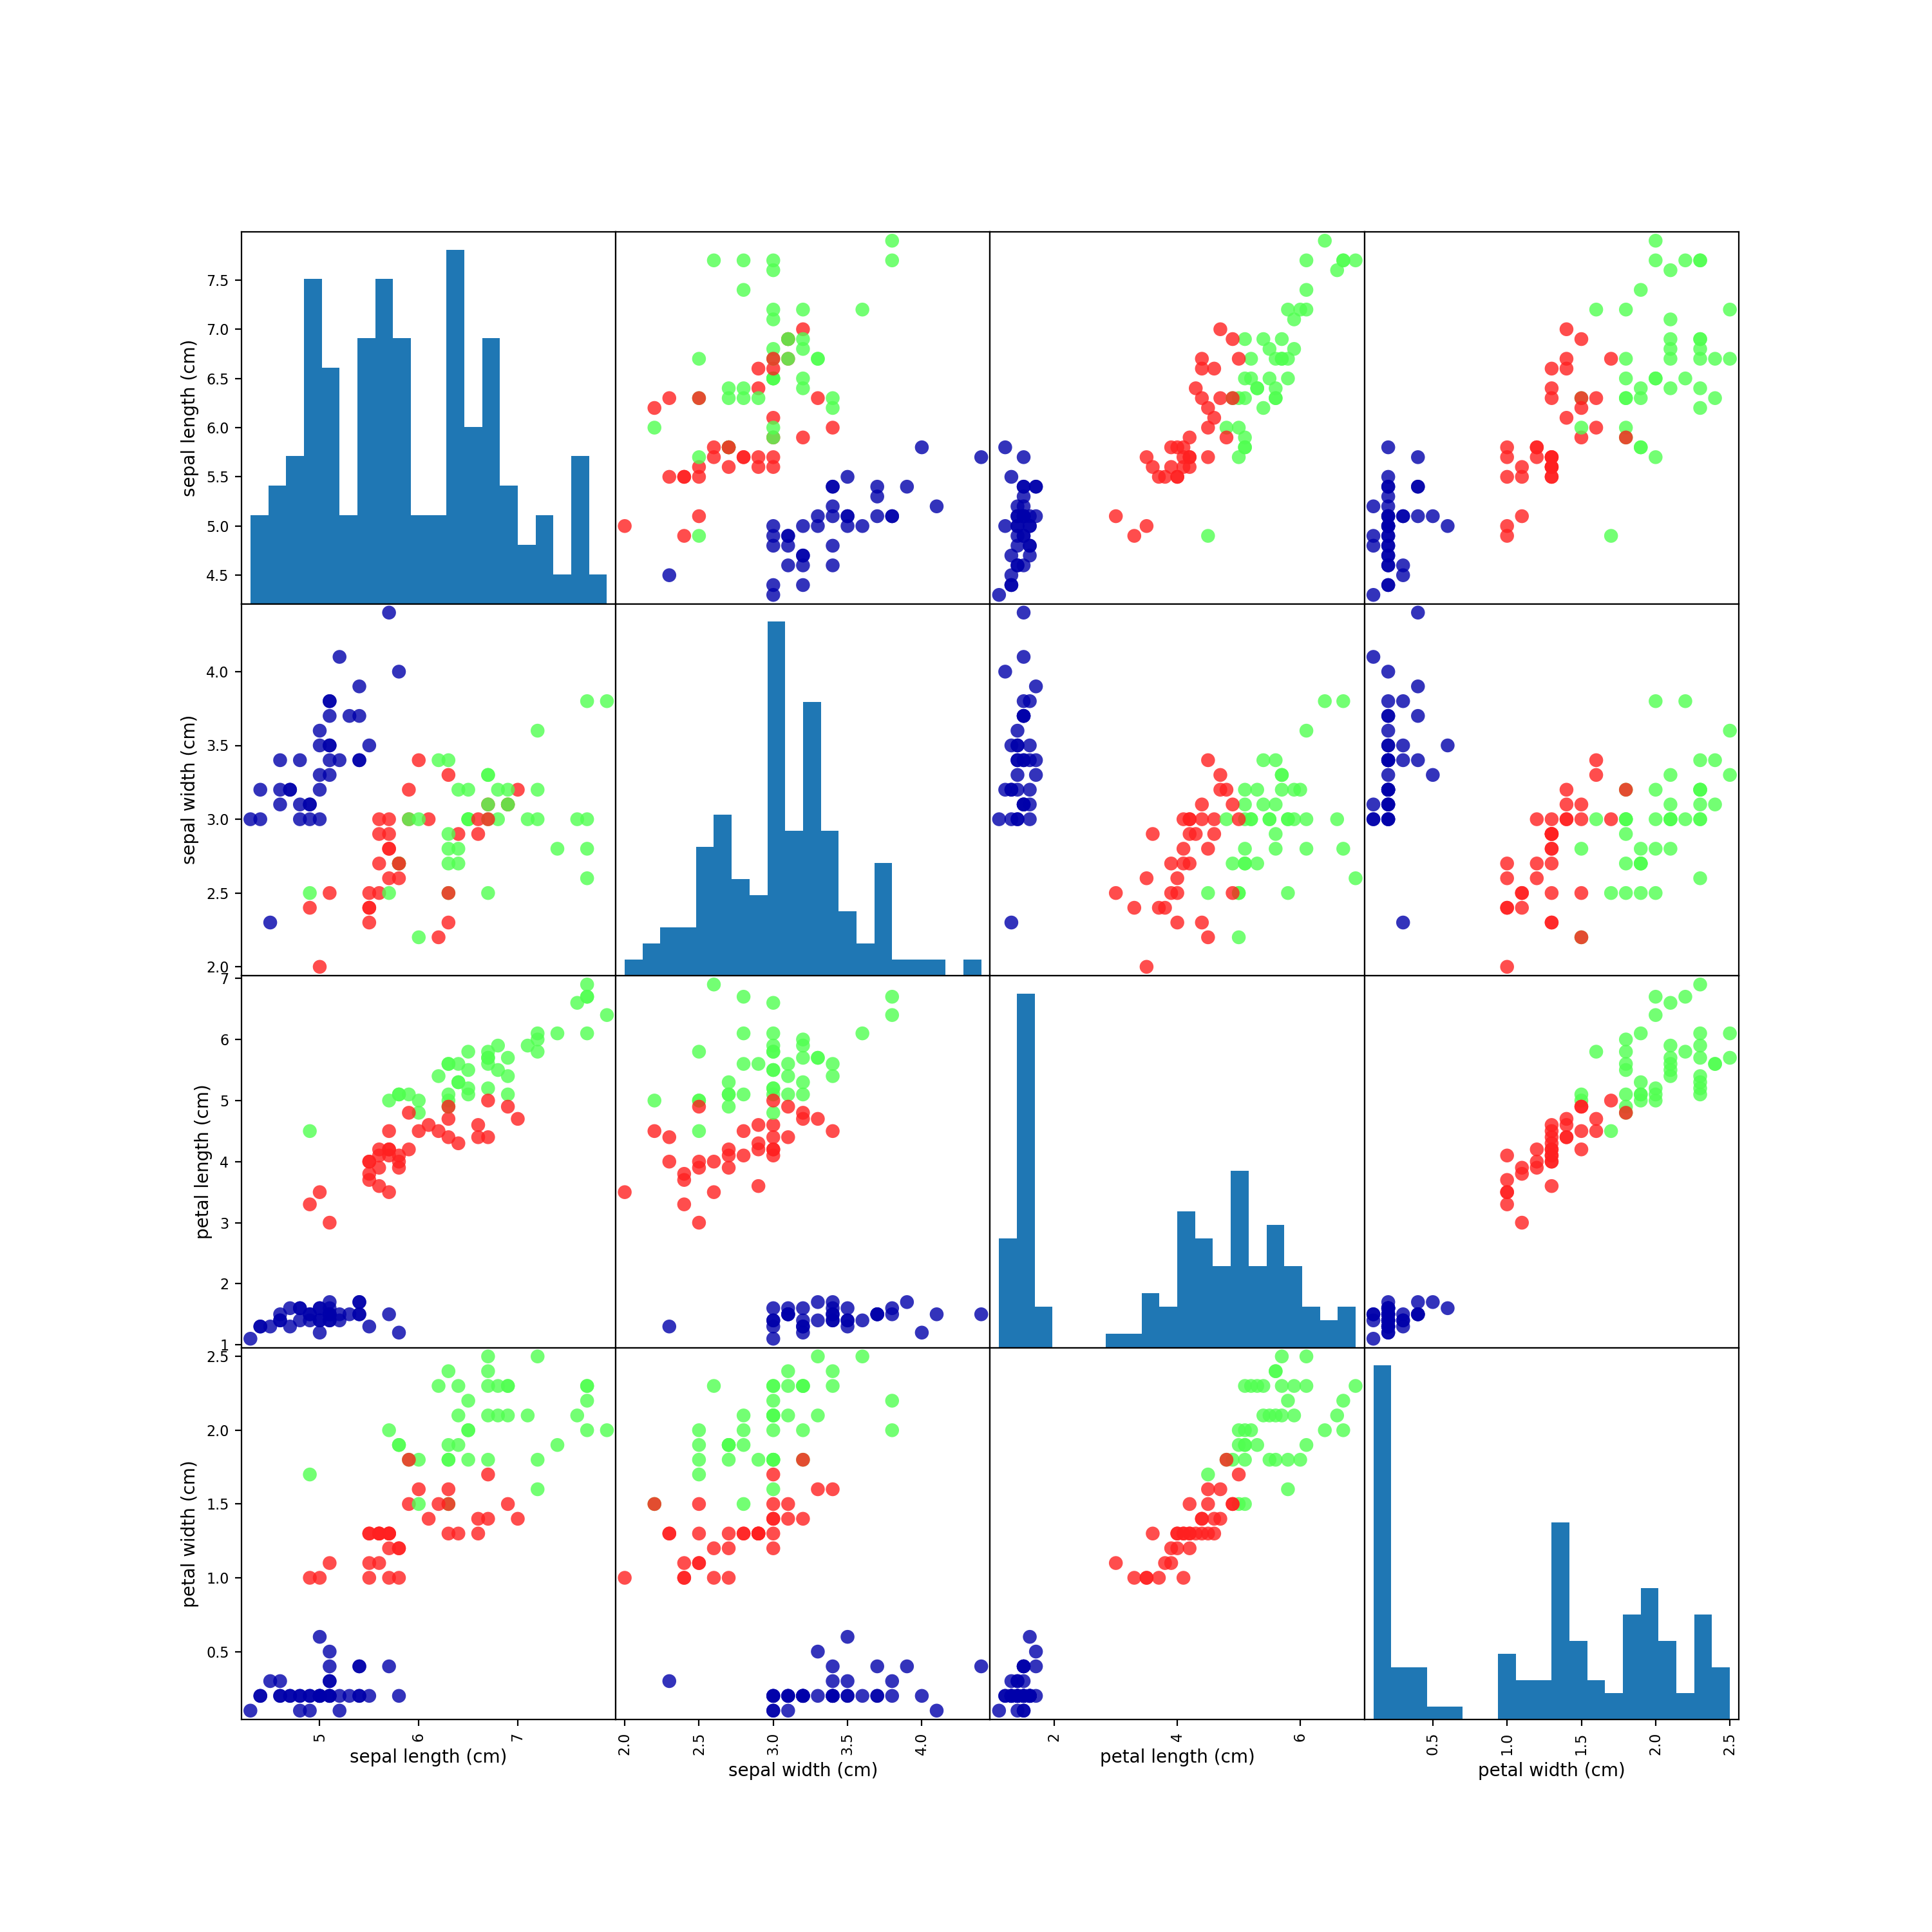

In [76]:
# 本のコードでは動かなかったので、https://teratail.com/questions/176447 の真似をした
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
grr = pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(15, 15), marker='o', hist_kwds={'bins': 20}, s=60, alpha=.8, cmap=mglearn.cm3)

In [77]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [78]:
X_new = np.array([[5, 2.9, 1, 0.2]])
print("X_new.shape: {}".format(X_new.shape))

X_new.shape: (1, 4)


In [79]:
prediction = knn.predict(X_new)
print("Prediction: {}".format(prediction))
print("Predictes target name: {}".format(iris_dataset['target_names'][prediction]))

Prediction: [0]
Predictes target name: ['setosa']


In [80]:
y_pred = knn.predict(X_test)
print("Test set predictions:\n {}".format(y_pred))

Test set predictions:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [81]:
# print("{:.2f}".format(n))で、小数第2位までを表示させる
print("Test set score: {:.2f}".format(np.mean(y_pred ==  y_test)))

Test set score: 0.97


In [82]:
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set score: 0.97
